In [29]:
#Let's begin by importing the necessary libraries
import os
import xgboost as xgb
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000       

<AxesSubplot:>

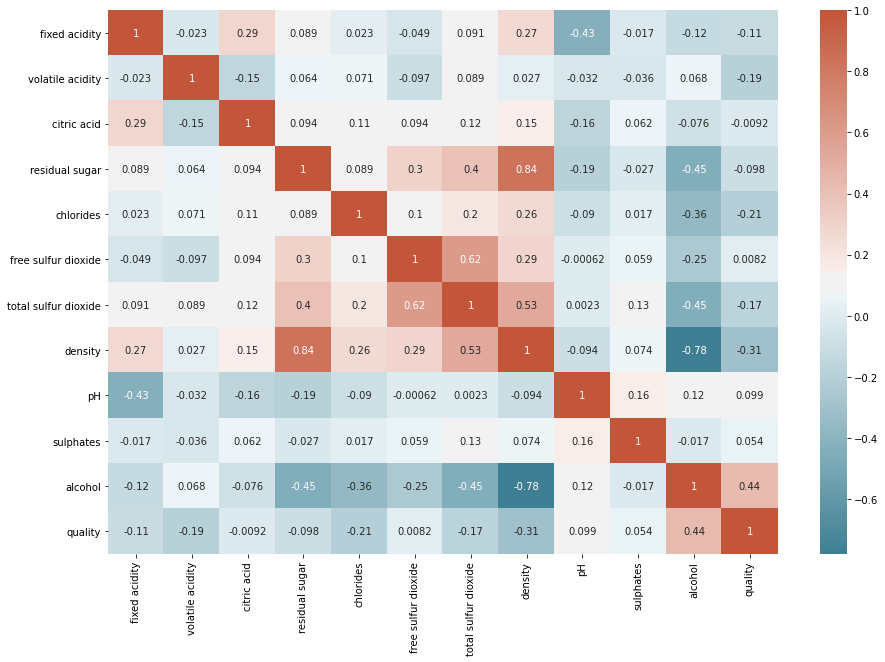

In [30]:
#Import the dataframes
df = pd.read_csv('none_sperry_anti-freeze.csv')
#A preliminary look at the data
#print(df.info())
cols = list(df.columns)
print("\n")
print(df.describe())
print("\n")
for col in cols:
    print(col)
    print(df[col].isnull().values.any())
#Look at some correlations

corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

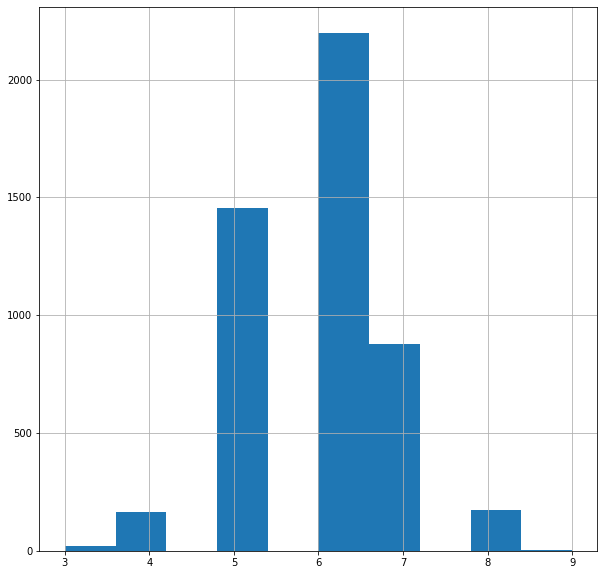

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


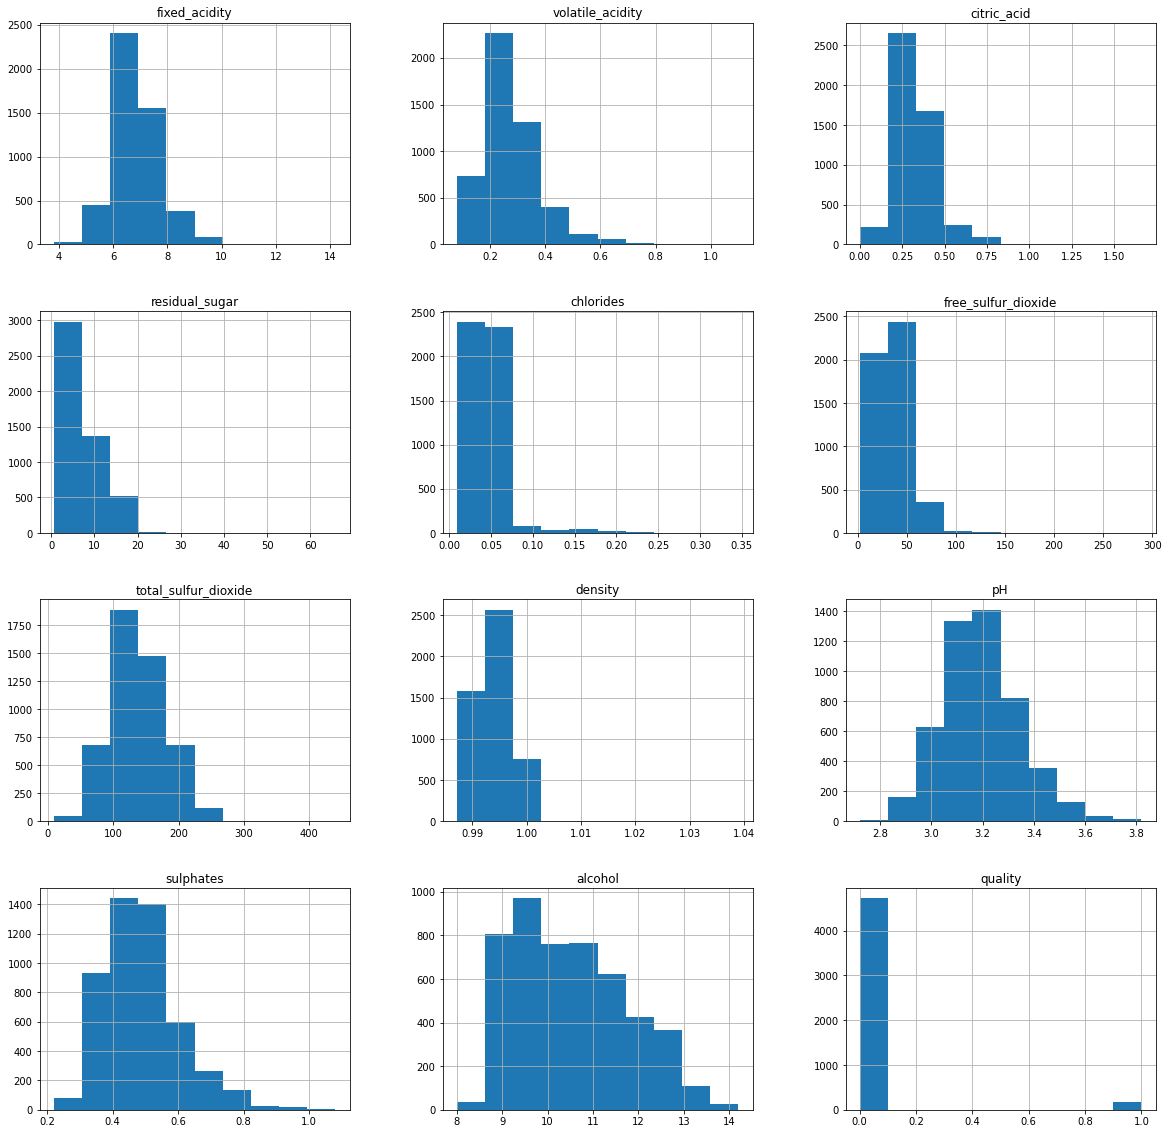

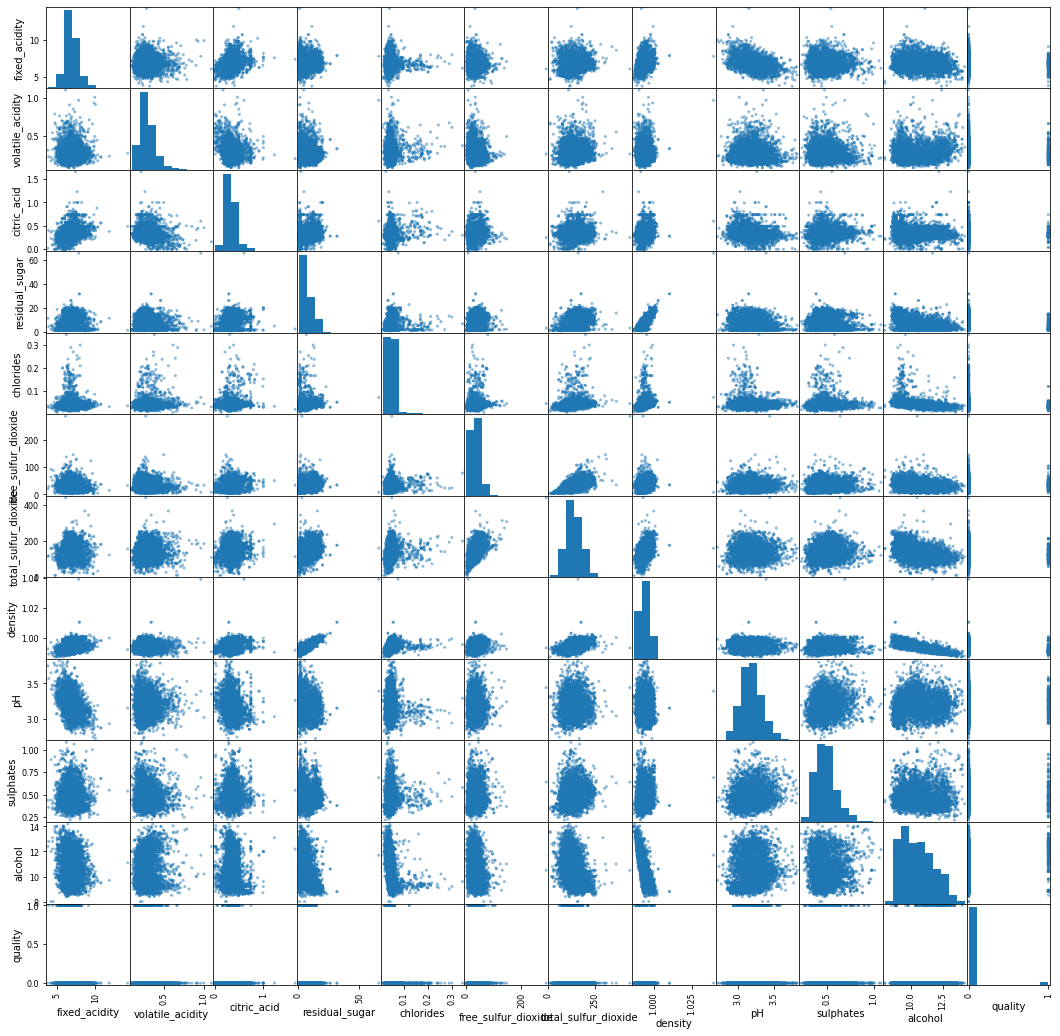

In [31]:
#Before converting the quality values into labels, we need to look at the distribution of the values
df['quality'].hist(figsize = (10,10))
plt.show()
df.rename(columns = {'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar',
          'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'},inplace = True)
print(df.columns)
def encode(x):
    if x <= 7:
        return 0
    else:
        return 1
df['quality'] = df['quality'].apply(encode)
df.hist(figsize = (20,20))
plt.show()
scatter_matrix(df, figsize = (18,18))
plt.show()

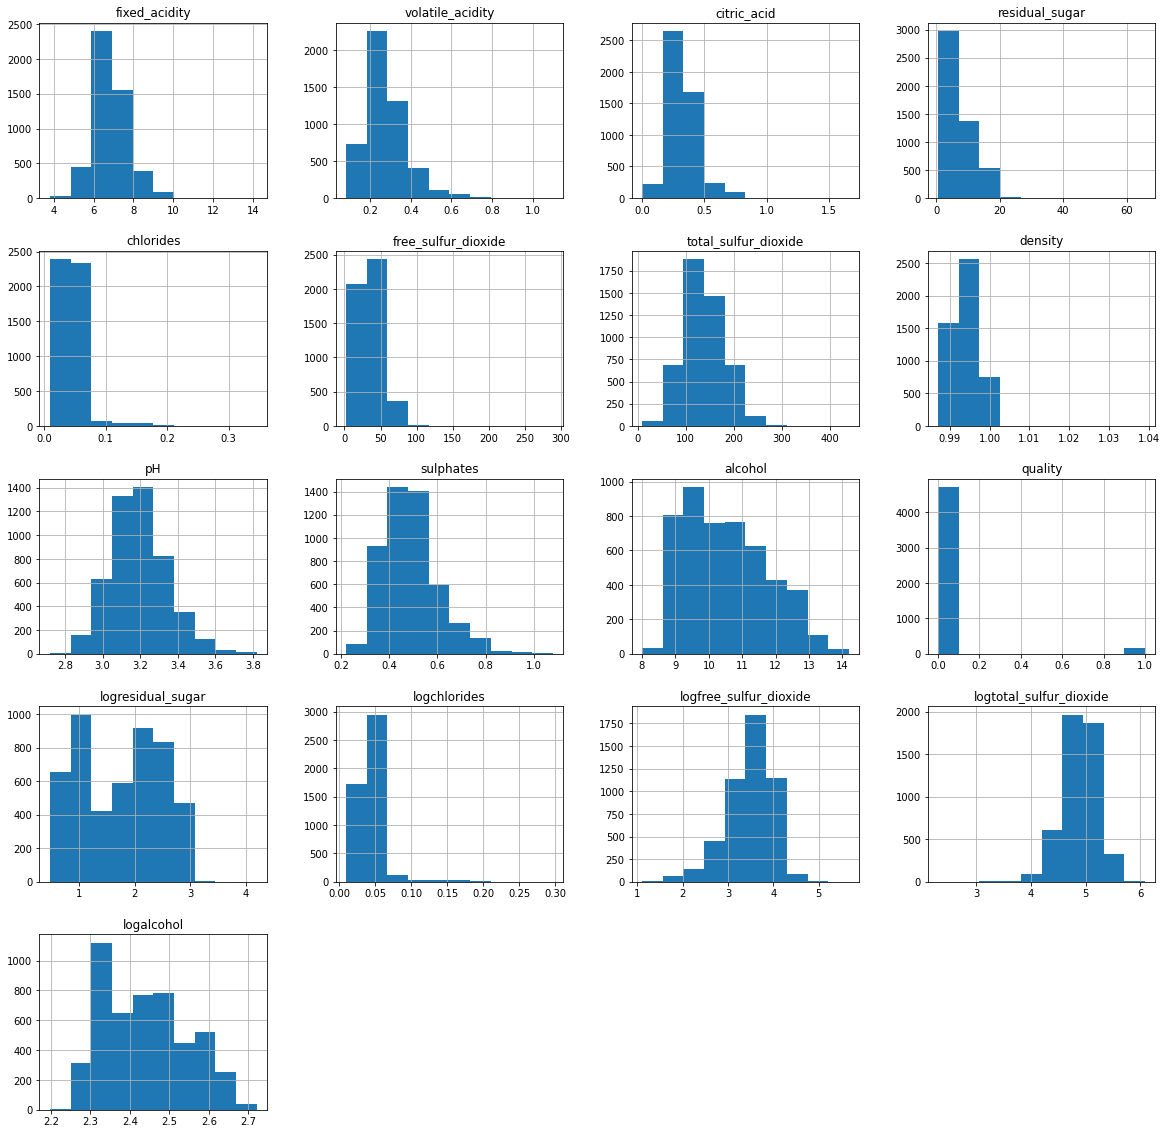

<AxesSubplot:>

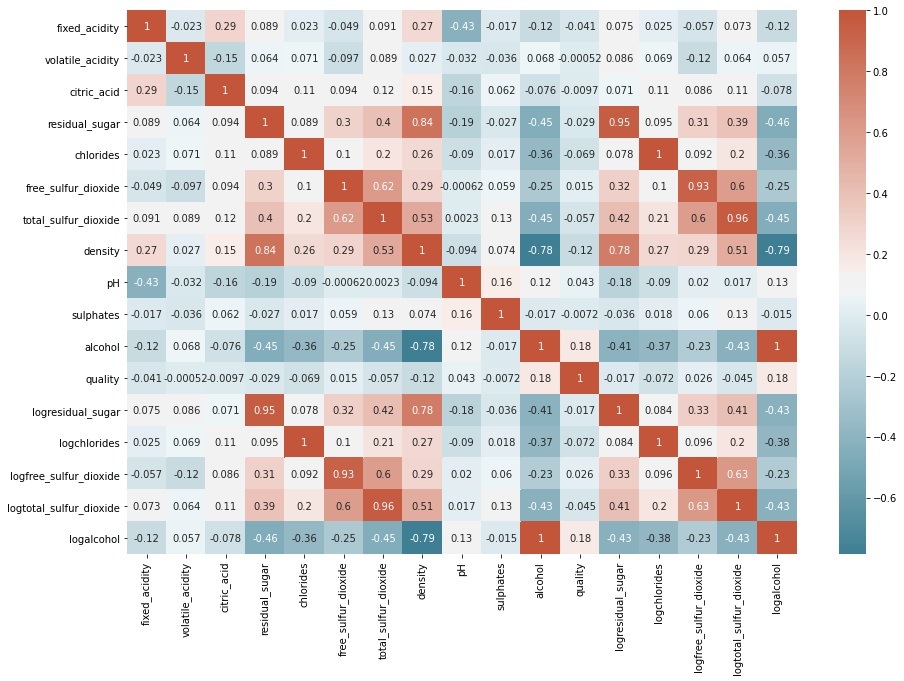

In [32]:
def logx(x):
    return np.log(1+x)
skewedFeatures = ['residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','total_sulfur_dioxide',
                 'alcohol']
for col in skewedFeatures:
    df['log' + col] = df[col].apply(logx)
#Look a the data again, particularly the skewed features
df.hist(figsize = (20,20))
plt.show()
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [33]:
X = df.drop(['quality','logresidual_sugar','logchlorides','logfree_sulfur_dioxide','logtotal_sulfur_dioxide','logtotal_sulfur_dioxide',
                 'logalcohol'],axis = 1)
Y = df['quality']
X_features = X
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state = 0)
#print(X_train.info())
del df #Clean up some memory

In [34]:
#Choose a few models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import fbeta_score,accuracy_score
dt = DecisionTreeClassifier(random_state=1)
rfc = RandomForestClassifier(random_state=1, n_jobs=2)
gdb = GradientBoostingClassifier(random_state=1)
abc = AdaBoostClassifier(random_state = 1)
xgbst = xgb.XGBClassifier(random_state=1)
classifiersList = [dt,rfc,gdb,abc,xgbst]
classifiersScores = []
classifiersTrainTimes = []

{0, 1}
DecisionTreeClassifier trained on 3673 samples.
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1186
           1       0.27      0.31      0.29        39

    accuracy                           0.95      1225
   macro avg       0.62      0.64      0.63      1225
weighted avg       0.95      0.95      0.95      1225



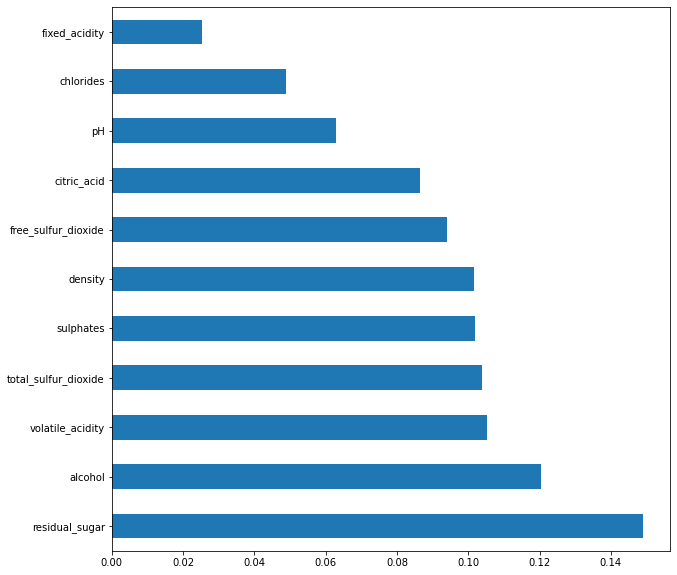



RandomForestClassifier trained on 3673 samples.
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1186
           1       0.83      0.26      0.39        39

    accuracy                           0.97      1225
   macro avg       0.90      0.63      0.69      1225
weighted avg       0.97      0.97      0.97      1225



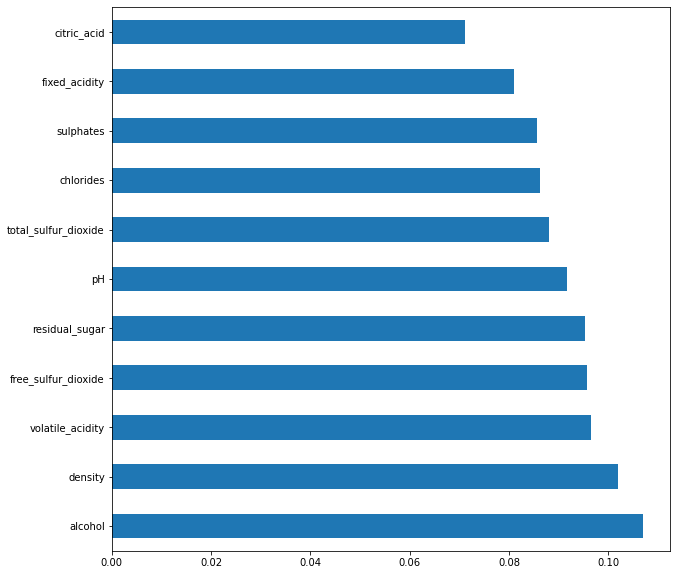



GradientBoostingClassifier trained on 3673 samples.
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1186
           1       0.40      0.10      0.16        39

    accuracy                           0.97      1225
   macro avg       0.69      0.55      0.57      1225
weighted avg       0.95      0.97      0.96      1225



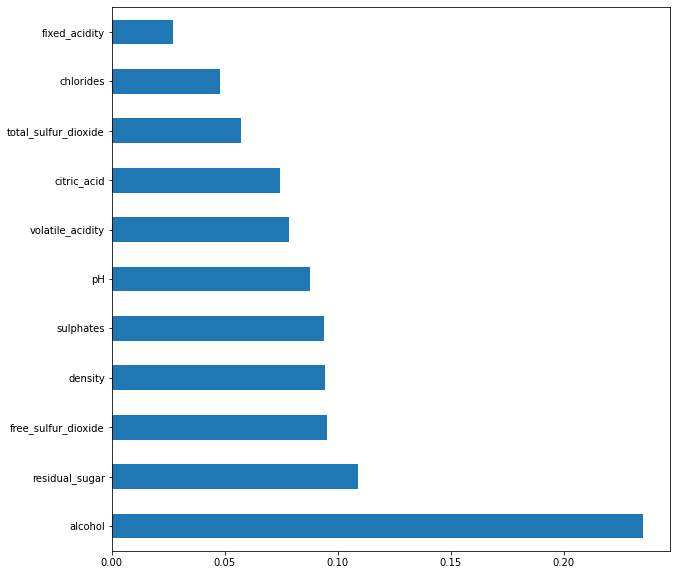



AdaBoostClassifier trained on 3673 samples.
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1186
           1       0.33      0.05      0.09        39

    accuracy                           0.97      1225
   macro avg       0.65      0.52      0.54      1225
weighted avg       0.95      0.97      0.95      1225



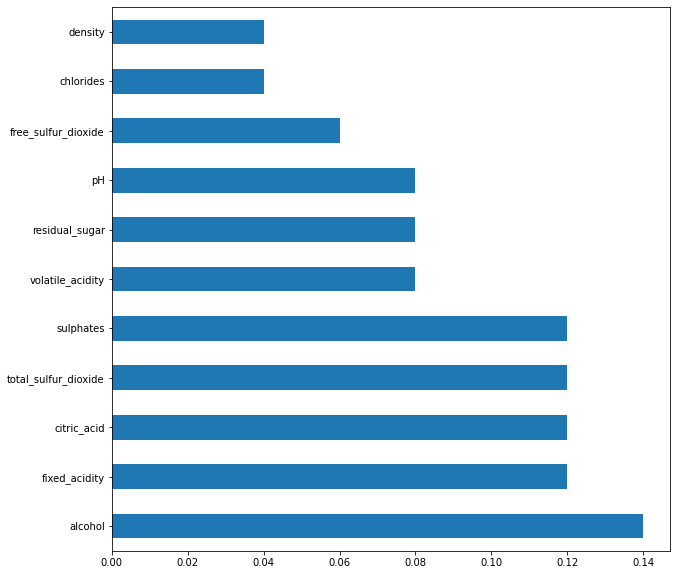



[03:57:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/bhargava/.local/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier trained on 3673 samples.
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1186
           1       0.85      0.28      0.42        39

    accuracy                           0.98      1225
   macro avg       0.91      0.64      0.71      1225
weighted avg       0.97      0.98      0.97      1225



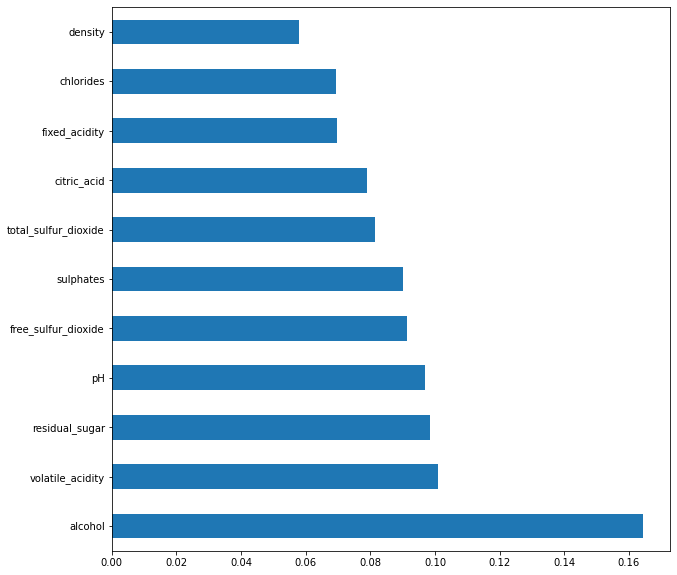



[0.27906976744186046, 0.5747126436781609, 0.2531645569620253, 0.15873015873015872, 0.6043956043956045]
[0.039208412170410156, 0.4546518325805664, 0.8240280151367188, 0.2947382926940918, 0.2007279396057129]
[0.9518367346938775, 0.9746938775510204, 0.966530612244898, 0.966530612244898, 0.9755102040816327]
['DecisionTree', 'RandomForest', 'GradientBoosting', 'AdaBoost', 'XGB']


In [35]:
#Train the models
from time import time
print(set(y_train))
def trainPredict(model,sampleSize,x_train,y_train,x_test,y_test):
    '''
    model: The algorithm
    sampleSize: The size of samples to draw from
    x_train: Training dataset
    y_train: Labels 
    x_test: Test set
    y_test: Test labels
    '''
    results = {}
    #Training the model 
    start = time()
    model.fit(x_train[:sampleSize],y_train[:sampleSize])
    end = time()
    results['training_time'] = end - start
    
    #Predictions 
    start = time()
    predictions_test = model.predict(x_test)
    end = time()
    results['testing_time'] = end - start
    results['acc_train'] = accuracy_score(y_test,model.predict(x_test))
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
    print ("{} trained on {} samples.".format(model.__class__.__name__, sampleSize))
    results['clf_name'] = model.__class__.__name__
    print(classification_report(y_test, predictions_test))
    feat_importances = pd.Series(model.feature_importances_, index=X_features.columns)
    feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))
    plt.show()
    print("\n")
    return results

#Create lists to store selected benchmarking results
clf_lscores = []
clf_ltrain_times = []
clf_lnames = []
clf_testAccuracies = []
clf_trainAccuracies = []

for model in classifiersList:
    #Train the various models on the same set of data to compare and choose the best model
    clfResults = trainPredict(model,len(y_train),X_train,y_train,X_test,y_test)
    clf_lscores.append(clfResults['f_test'])
    clf_ltrain_times.append(clfResults['training_time'])
    clf_testAccuracies.append(clfResults['acc_test'])
    clf_trainAccuracies.append(clfResults['acc_train'])
    clf_lnames.append(clfResults['clf_name'].replace('Classifier', ''))
print(clf_lscores)
print(clf_ltrain_times)
print(clf_testAccuracies)
print(clf_lnames)

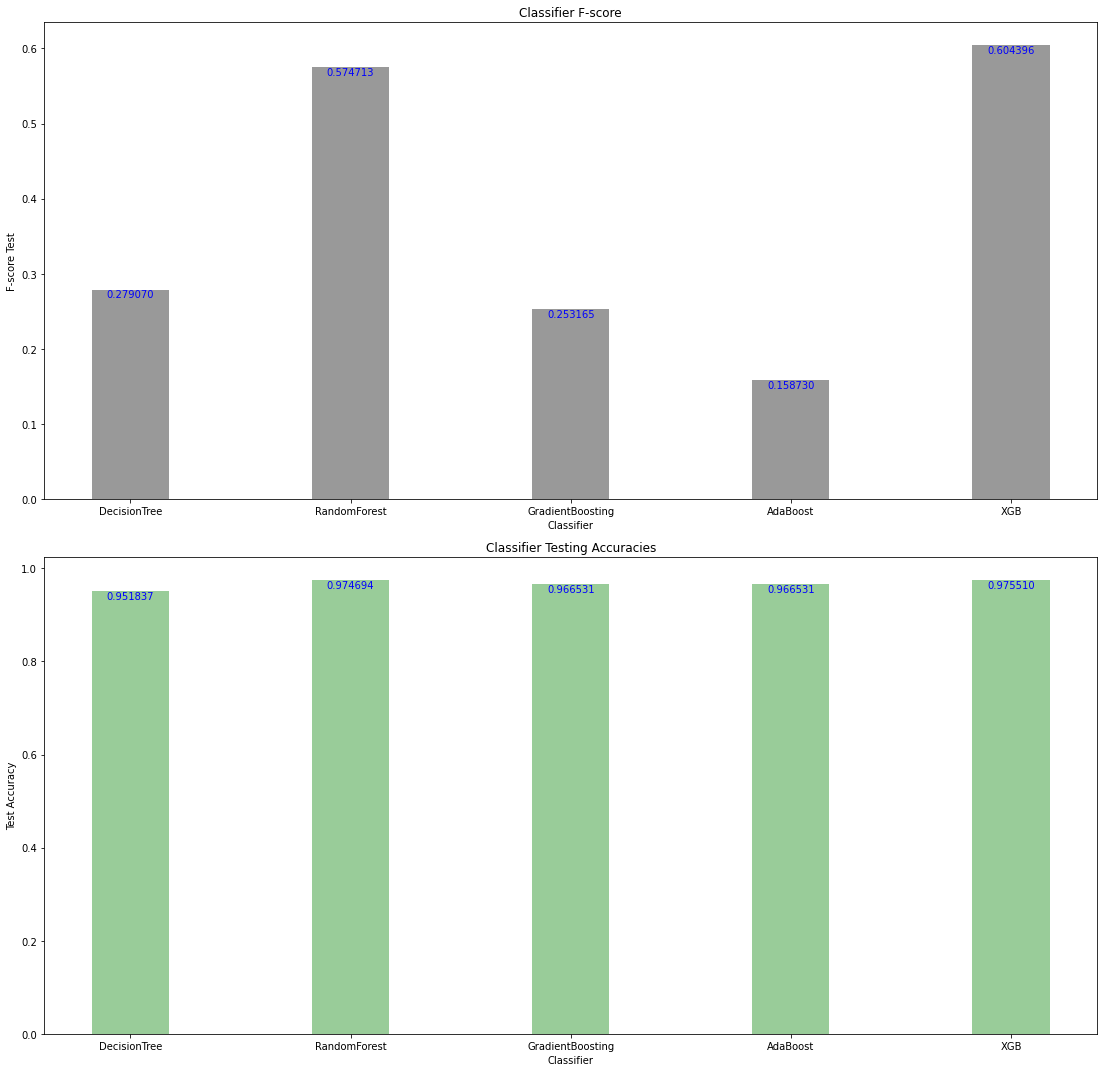

In [36]:
#Plot the results
plt.figure(1,figsize = (45,15))
nGroups = len(clf_lscores)
index = np.arange(nGroups)
barWidth = 0.35
opacity = 0.4
data1 = clf_lscores
data2 = clf_testAccuracies 
plt.subplot(2,3,1)
plt.xlabel('Classifier')
plt.ylabel('F-score Test')
plt.title('Classifier F-score')
plt.xticks(index, clf_lnames)
bar1 = plt.bar(index, data1, barWidth, alpha=opacity, color='k')
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color = 'b')
plt.subplot(2,3,4)
plt.xlabel('Classifier')
plt.ylabel('Test Accuracy')
plt.title('Classifier Testing Accuracies')
plt.xticks(index, clf_lnames)
bar2 = plt.bar(index, data2, barWidth, alpha=opacity, color='g')
for rect in bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%f' % height, ha='center', va='top',color = 'b')
plt.tight_layout()
plt.show()

In [37]:
#Model tuning
#Let's select a model and change the parameters and this can be done for different models 
#I'll choose the RandomForestClassifier and change its parameters to reflect the change in Accuracy and other things
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = RandomForestClassifier(random_state=42, n_jobs=2)
parameters = {'max_depth': [4,8,12,16,20], 'n_estimators': [150, 200,250]}
scorer = make_scorer(fbeta_score,beta=0.5)

grid_obj = GridSearchCV(clf, parameters,scoring=scorer)

#Fit the grid object using fit(), training data and the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train)

#Get the estimator 
best_clf = grid_fit.best_estimator_

#Predictions using both the unoptimized and the optimized model 
predsUnoptimized = (clf.fit(X_train, y_train)).predict(X_test)
predsOptimized = best_clf.predict(X_test)

#Best fit parameters
print("Best gridsearch parameters\n------")
print(grid_fit.best_params_)

#Report the change in accuracies 
print("Unoptimized model characteristics\n-----")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test,predsUnoptimized)*100))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predsUnoptimized, beta = 0.5)))
print("\nOptimized model characteristics\n-----")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test,predsOptimized)*100))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predsOptimized, beta = 0.5)))

Best gridsearch parameters
------
{'max_depth': 20, 'n_estimators': 150}
Unoptimized model characteristics
-----
Accuracy score on testing data: 97.5510
F-score on testing data: 0.6024

Optimized model characteristics
-----
Accuracy score on testing data: 97.5510
F-score on testing data: 0.6024
